In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()

In [7]:
# reflect an existing database into a new model

Base.prepare(autoload_with=engine)
# reflect the tables


In [17]:
# View all of the classes that automap found
Base.classes.keys()
Station = Base.classes.station

In [9]:
# Save references to each table
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print(recent_date)

2017-08-23


2016-08-23


Text(0, 0.5, 'Inches')

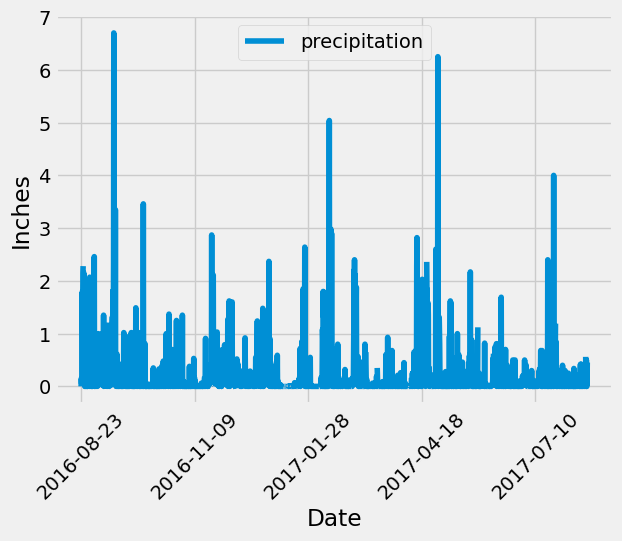

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = session.query(func.date(func.max(Measurement.date), '-365 days')).scalar()
print(previous_year)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= previous_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_date = [precip[0] for date in precip]
precipitation = [precip[1] for prcp in precip]

rain_df = pd.DataFrame(precip, columns=['rain_date', 'precipitation'])
# Sort the dataframe by date
rain_df.set_index('rain_date')

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(x='rain_date', y='precipitation', rot=45)
plt.xlabel('Date')
plt.ylabel('Inches')

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).count()
station_count

9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = 'USC00519281'
climate_anly = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                             filter(Measurement.station == active_station).all()
climate_anly

[(54.0, 85.0, 71.66378066378067)]

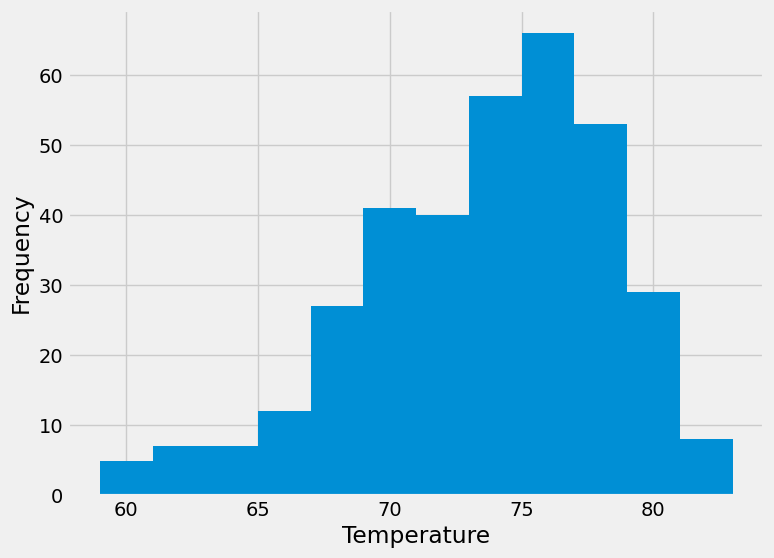

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_data = session.query(Measurement.tobs).filter((Measurement.station == active_station), (Measurement.date >= previous_year)).all()

temps = list(np.ravel(active_data))

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(temps, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [22]:
# Close Session
session.close()